### Neural Network classification with Pytorch

* Classification is a problem predicting weather something is ine thing or another thing

### 1.Make classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=100) # keep random state so we get the same values)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[-1.00038985  0.02348052]
 [-0.19036705 -1.01750748]
 [ 0.71463597  0.37954286]
 [ 0.60316858 -0.78886949]
 [ 0.56238969  0.56515025]]

First 5 y labels:
[0 0 1 0 1]


In [5]:
y

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [6]:
#make DataFrames of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,-1.000390,0.023481,0
1,-0.190367,-1.017507,0
2,0.714636,0.379543,1
3,0.603169,-0.788869,0
4,0.562390,0.565150,1
5,0.025748,1.006406,0
6,1.050432,-0.097989,0
7,0.623187,0.525558,1
8,0.747905,-0.180497,1
9,0.559672,-0.620578,1


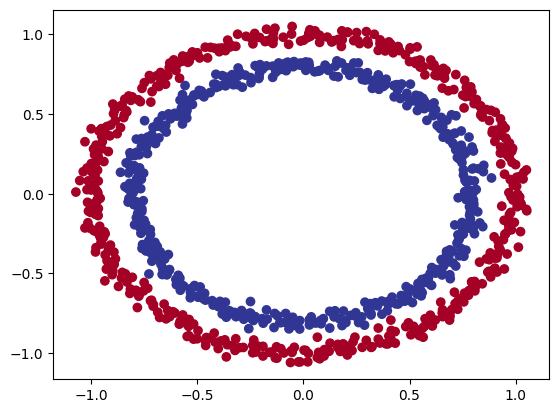

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

### Check input and output shapes

In [8]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X

array([[-1.00038985,  0.02348052],
       [-0.19036705, -1.01750748],
       [ 0.71463597,  0.37954286],
       ...,
       [-0.34854069, -0.73386791],
       [-0.69073184, -0.39968317],
       [ 0.74728993,  0.23031586]])

In [10]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-1.00038985  0.02348052] and the same for y: 0
Shapes for one sample of X: (2,) and the same for y: ()


### Turn data into tensors and create train and test splits

In [11]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[-1.0004,  0.0235],
         [-0.1904, -1.0175],
         [ 0.7146,  0.3795],
         [ 0.6032, -0.7889],
         [ 0.5624,  0.5652]]),
 tensor([0., 0., 1., 0., 1.]))

In [12]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [13]:
torch.manual_seed(100)

In [14]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=100) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [15]:
n_samples

1000

### 2. Building a model

* Setting up device agnostic code (so our model can run on CPU or GPU if it's available).

* Constructing a model by subclassing nn.Module.

* Defining a loss function and optimizer.

* Creating a training loop (this'll be in the next section).

In [16]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [17]:
X_train

tensor([[ 1.0185,  0.1074],
        [ 0.1258, -0.9372],
        [ 0.0194,  0.9787],
        ...,
        [-1.0000,  0.4072],
        [-0.2295,  1.0047],
        [-0.8570, -0.5282]])

Now we have setup device agnostic code,lets create a model that:

* Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).

* Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.

* Defines a forward() method containing the forward pass computation of the model.

* Instantiates the model class and sends it to the target device.


In [18]:
X_train.shape

torch.Size([800, 2])

In [19]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
device

'cuda'

In [21]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
model_0.state_dict

<bound method Module.state_dict of Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)>

In [24]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.5652],
        [-0.4955],
        [-0.8989],
        [-0.8899],
        [-0.8956],
        [-0.5636],
        [-0.6716],
        [-0.5165],
        [-0.7244],
        [-0.8888]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 1., 0., 1., 1., 1., 1., 0., 0., 1.])


In [25]:
X_test[:10],y_test[:10]

(tensor([[-0.2484, -0.7495],
         [ 0.4466, -0.6914],
         [ 0.0756,  0.9939],
         [-0.3040,  0.7414],
         [-0.5697,  0.6210],
         [ 0.7637, -0.1966],
         [ 0.7388,  0.2958],
         [ 0.9204, -0.3304],
         [-0.9340, -0.3829],
         [-0.5161,  0.6187]]),
 tensor([1., 1., 0., 1., 1., 1., 1., 0., 0., 1.]))